In [4]:
import os
import sys

cwd0 = '../config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Sunday 21 May 2023, 19:43:11  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="../config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

## **Exercices.** Lecture et analyse de bases de données par la librairie pandas.<br><br>*Reading and analyzis of databases with the pandas library*

### Importation des modules utiles<br>*Importation of the useful libraries*

In [5]:
# exécutez cette cellule, sans la modifier
# run this cell, without any modification
%matplotlib inline
import numpy as np 
from pylab import *
# d'autres bibliothèques seront importées au fur et à mesure des besoins
# other libraries will be imported "on the fly", when necessary

### **Exercice 1**. Création des données aux formats `np.array` & `pandas`<br>*Creation of data under the `np.array` & `pandas` formats*

<div class="intro">La première partie a pour but de créer des données au format <code>pandas</code>. Certaines séries de données sont corrélées entre elles. On vérifiera dans la deuxième partie que la carte thermique est cohérente avec les corrélations</div>
<div class="introE">The goal of the first part is to create data and to store them as <code>pandas</code> dataframes. Some series are correlated. We will check in the second part that the heatmap is consistent with these correlations.</div>

#### **1.** Création des données<br>*Creation of datas*

<div class="intro">

Vous n'avez aucune intervention à faire dans la cellule suivante, à part l'exécuter. On va générer :
- un jeu de 100 valeurs aléatoires `X1`, comprises entre [-10, 10]
- un deuxième jeu de 100 valeurs aléatoires `X2`, dans le même intervalle
- des valeurs bruitées, autour d'une fonction $f_1(x)=2x$, calculées pour chacune des valeurs de `X1`
- des valeurs bruitées, autour d'une fonction $f_2(x)=-3x$, calculées également pour chacune des valeurs de `X1`

Les données `(X1, f1(X1))` et `(X1, f2(X1))` sont stockées dans deux tableaux `data1` et `data2`.
</div>
<div class="introE">

Do not change anything in the next cell, just run it. This piece of code will generate:
- a set of 100 random numbers `X1`, ranging between [-10, 10]
- a second set of 100 random numbers `X2`, ranging in the same domain
- numbers that follow the $f_1(x)=2x$ function, after addition of a random noise, and calculated for all data of the `X1` array
- numbers that follow the $f_2(x)=-3x$ function, after addition of a random noise, and also calculated for all data of the `X1` array
    
`(X1, f1(X1))` et `(X1, f2(X1))` data are stored into two arrays, `data1` and `data2`.

</div>

In [6]:
# exécutez cette cellule, sans la modifier
# run this cell, without any modification
import random

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,nbp)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 2*x
def f2(x):
    return -3*x

nbp = 100
xmin = -10
xmax = 10. 
# tableaux/arrays X1 & X2
# random.uniform(low=0.0, high=1.0, size=None)
X1 = np.random.uniform(xmin,xmax,nbp)
X2 = np.random.uniform(xmin,xmax,nbp)

data1 = noiseF(f1,X1)
data2 = noiseF(f2,X1)

#### **2.** Affichage des données contenues dans `data1` et `data2`<br>*Displaying the data stored in `data1` and `data2`*

<div class="intro">

Affichez le `type` des tableaux `data1` et `data2` ainsi que leur forme (`shape`), puis enfin leur contenu
    
</div>
<div class="introE">

Display the `type` of arrays `data1` and `data2`, as well as their `shape`, and finally their content
</div>

In [7]:
# entrez ci-dessous votre code python / write your code here

print(type(data1),type(data2))
print(shape(data1),shape(data2))
print("data1",data1)
print("data2",data2)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 2) (100, 2)
data1 [[  6.45548292   9.26292346]
 [ -4.0375071  -11.27214156]
 [ -5.29291595 -11.99446826]
 [  4.86376573  13.90957298]
 [  9.49490925  18.35729593]
 [ -5.61546583 -16.29005764]
 [  5.08458791  10.17572123]
 [  4.27202766   9.10895831]
 [ -7.81843397 -16.99249214]
 [ -8.51035285 -22.78009778]
 [ -3.95193094  -9.25188508]
 [ -6.76144022 -13.35386129]
 [ -3.02169079  -5.73519287]
 [ -3.15171869  -9.91710819]
 [  1.67585154   0.32736253]
 [  6.68456569  12.43795537]
 [  3.32756301   7.05981381]
 [  3.5850247   11.55231254]
 [  3.0601997    5.37561151]
 [ -3.11239549  -8.10025798]
 [ -2.54529142  -6.21968459]
 [ -2.2023366   -6.45077151]
 [  7.64362653  12.19820444]
 [  3.92697355   5.01896125]
 [ -6.91251548 -17.1841206 ]
 [ -2.04839582  -5.69686354]
 [  7.6578935   17.54990811]
 [ -6.86956143 -13.95526008]
 [  8.81290039  15.26119348]
 [  9.39769574  19.02473937]
 [  6.98193365  16.05892066]
 [ -6.33546282 -15.04766872]


<div class="rq">

Vous venez de vérifier que `data1` et `data2` sont des tableaux à deux dimensions au format `numpy`. La première colonne contient 100 valeurs de $x$, et la deuxième les valeurs de $f_i(x)$ correspondantes 

</div>
<div class="rqE">

You have just checked that `data1` et `data2` are `numpy` 2D arrays. 100 $x$ values are stored in the first column, whilst the second one contains the 100 corresponding $f_i(x)$ values. 

</div>

#### **3.** Quelques manipulations simples de tableaux<br>*Basic manipulation of arrays*

<div class="intro">

Affichez seulement les valeurs de $x$ contenues dans `data1`, puis seulement les valeurs de $f_1(x)$, c'est-à-dire les contenus de la première puis de la deuxième colonne. Vérifiez au passage que $f_2(x)$ a bien été évaluée pour les mêmes valeurs de $x$ que $f_1(x)$, et ce *sans afficher les valeurs de $x$ de `data2`* 

</div>

<div class="introE">

Display only the values of $x$ contained in `data1`, then only the values of $f_1(x)$ , *i.e.*, the contents of the first and then the second column. Check that $f_2(x)$ has been evaluated for the same values of $x$ as $f_1(x)$ , without displaying the values of $x$ of `data2`

</div>

In [9]:
# entrez ci-dessous votre code python / write your code here

print("X1 : ",data1[:,0])
print("f1 : ",data1[:,1])
print(data1[:,0] == data2[:,0])

# Remarque : on peut faire un peu mieux, en utilisant np.all(), qui renvoie True si tous les éléments
# d'un tableau numpy sont True et qui renvoie False dans le cas contraire
# Note: we can do a little better, using np.all(), which returns True if all elements
# of a numpy array are True and returns False otherwise
print()
print("numpy.all() : ",(data1[:,0] == data2[:,0]).all())

X1 :  [ 6.45548292 -4.0375071  -5.29291595  4.86376573  9.49490925 -5.61546583
  5.08458791  4.27202766 -7.81843397 -8.51035285 -3.95193094 -6.76144022
 -3.02169079 -3.15171869  1.67585154  6.68456569  3.32756301  3.5850247
  3.0601997  -3.11239549 -2.54529142 -2.2023366   7.64362653  3.92697355
 -6.91251548 -2.04839582  7.6578935  -6.86956143  8.81290039  9.39769574
  6.98193365 -6.33546282 -9.27975183 -8.38872483 -5.5901807  -7.41183101
  4.03230745  2.7371708   0.70541893  1.27669515  6.25184653  7.15638539
 -5.70127408 -4.86387374  8.36169423 -5.41165614  7.24712767 -7.46453723
 -1.02364983 -2.99343104 -1.33999801  9.63161278 -3.801488   -9.76106816
 -0.89107259  8.52857764  8.29155979 -7.46688835 -3.97148985  9.3753366
  3.04155644  9.4831369   9.06430147  8.06688594 -5.76936533 -8.43000048
  6.2516234   5.17496973 -5.31767301 -9.50525688  5.1541557  -7.10501342
 -3.03151277  1.44013513  3.27891782 -1.31979222  7.14900899  3.91260732
  9.5711068   2.97016156 -2.04402205 -9.5811733

<div class="rq">

Par la suite, les tableaux $x$, $f_1(x)$ et $f_2(x)$ seront désignés `X1`, `X2`, `f1` et `f2`

</div>

<div class="rqE">

From now on, arrays $x$, $f_1(x)$ and $f_2(x)$ will be named `X1`, `X2`, `f1` et `f2`

</div>

#### **4.** Tracé des fonctions `f1` et `f2`<br>*Plotting of the `f1` and `f2` functions* 

<div class="intro">

On va tracer les 2 fonctions pour voir à quoi elles ressemblent.  Vérifiez *de visu* que les distributions de points sont cohérentes avec les expressions des fonctions. On suggère d'utiliser la fonction `scatter`, qui prend principalement 2 variables. On recommande d'ajouter un label à chaque tracé : <br>
`scatter(tableau des valeurs de x, tableau des valeurs de y, label='votrelabel')`
    
</div>
<div class="introE">

We will plot the 2 functions to see what they look like.  Visually check that the data distributions are consistent with the expressions of the functions. It is advisable to use the `scatter` function, which mainly takes 2 variables. It is recommended to add a label to each graph: <br>
`scatter(x array, y array, label='yourlabel')`
    
</div>

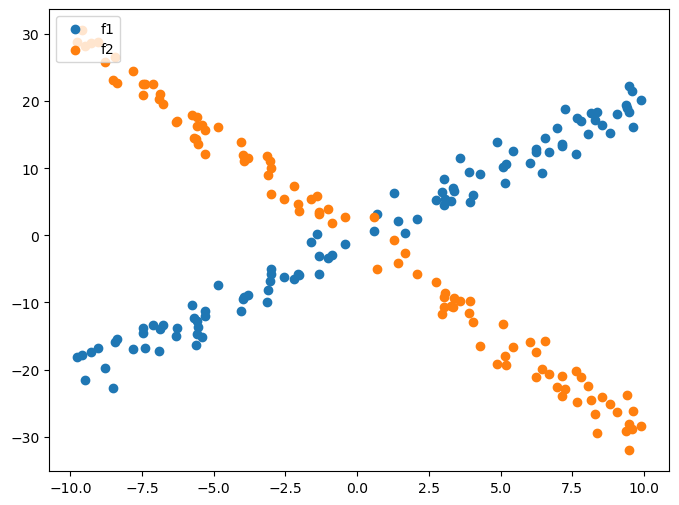

In [11]:
# définition de la taille de la figure / figure size
figure(figsize = (8,6))

# entrez ci-dessous votre code python / write your code here
scatter(data1[:,0],data1[:,1],label='f1')
scatter(data2[:,0],data2[:,1],label='f2')
legend(loc="upper left")

#### **5.** Création et affichage d'un dataframe au format pandas<br>*Creating and displaying a pandas dataframe*

<div class="intro">

- Stockez ces données au format pandas dans un dataframe nommé `df`. Les deux premières colonnes du tableau `df` vont contenir les valeurs de X1 et X2, et les suivantes les valeurs que prennent les fonctions f1 et f2 pour chacune des valeurs de X1

-  Affichez le tableau `df`, qui contient les données</div>

<div class="introE">

- Store this data in pandas format in dataframe named `df`. The first two columns of the array `df` will contain the values for `X1` and `X2`, and the following columns will contain the values that the functions `f1` and `f2` take for each of the values of `X1`

- Display the `df` dataframe, which contains the data</div>

In [12]:
import pandas as pd

# le tableau pandas (i.e. un dataframe) df est crée par cette ligne, X1 étant la première colonne
# a pandas table (i.e. a dataframe) df is created below, X1 being the first column
df = pd.DataFrame(X1, columns = ['X1'])

# entrez ci-dessous votre code python pour compléter le dataframe df / write your code here to complete the df dataframe
df['X2'] = pd.DataFrame(X2)
df['f1'] = pd.DataFrame(data1[:,1])
df['f2'] = pd.DataFrame(data2[:,1])

# entrez ci-dessous votre code python pour afficher le contenu de df / write your code here to display the df dataframe
display(df)

,X1,X2,f1,f2
0,6.455483,-4.049115,9.262923,-19.977962
1,-4.037507,8.492137,-11.272142,13.920337
2,-5.292916,7.157954,-11.994468,15.742877
3,4.863766,-9.403327,13.909573,-19.107254
4,9.494909,-8.515990,18.357296,-32.032026
...,...,...,...,...
95,-5.589583,3.396987,-12.810017,16.266661
96,3.041830,-0.787861,4.583647,-9.146186
97,3.373222,4.151590,6.638767,-9.286208
98,7.818422,-1.239580,17.063807,-21.175823


### **Exercice 2.** Analyse statistique basique des données et recherche de possibles corrélations entre données<br>*Basic statistical analysis of the data and correlation analysis*

#### **1.** Statistiques descriptives<br>*Descriptive statistics*

<div class="intro">

Afficher les statistiques descriptives des données contenues dans `df`, c'est-à-dire moyenne, écart-type, etc... (*suggestion*: utiliser la fonction `describe` de `pandas`)

</div>

<div class="introE">

Print the descriptive statistics of the data stored in `df`, *i.e.* mean, standard deviation, etc... (*hint*: use the`describe` function of `pandas`)

</div>

In [13]:
# entrez ci-dessous votre code python / write your code here
df.describe()

,X1,X2,f1,f2
count,100.000000,100.000000,100.000000,100.000000
mean,0.396907,0.049214,0.406565,-1.314856
std,6.133485,5.101728,12.927726,18.387936
min,-9.761068,-9.403327,-22.780098,-32.032026
25%,-5.448810,-4.534642,-12.065961,-19.171180
50%,0.639860,0.224373,0.525452,0.641683
75%,6.251679,3.950654,12.394715,14.775246
max,9.896201,9.566874,22.206043,30.581910


#### **2.** Recherche des possibles corrélations entre les données<br>*Correlation analysis*

<div class="intro">

Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot` de `seaborn`)
</div>

<div class="introE">
    
Plot pairwise relationships between variables within the `df`  dataset. (*hint*: use the `pairplot` function of `seaborn`)
</div>

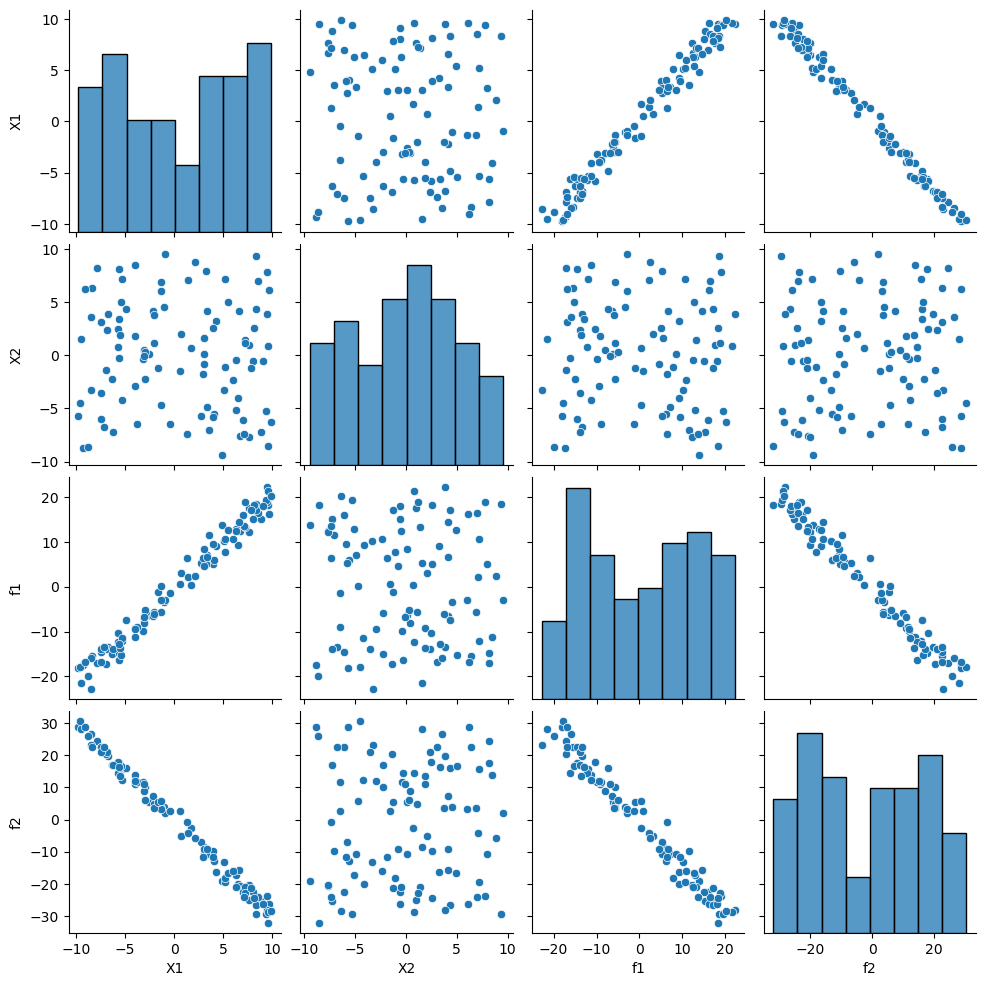

In [14]:
import seaborn as sns
# entrez ci-dessous votre code python / write your code here
sns.pairplot(df)

#### **3.** Carte thermique<br>*Heatmap*

<div class="intro">

Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap` de `seaborn`, avec les options `annot = True, cmap='coolwarm'` et en utilisant les bornes appropriées `vmin` et `vmax`. Le tableau (matrice) de corrélation entre données est quant à lui calculé avec la fonction `corr` de `pandas`)

</div>

<div class="introE">

Plot a heatmap (*hint*: use the `heatmap` tool of `seaborn`, with arguments `annot = True, cmap='coolwarm'` and by using appropriate `vmin` et `vmax` values. The pairwise correlation matrix will be computed with the `corr` function imported from `pandas`)

</div>

<Axes: >

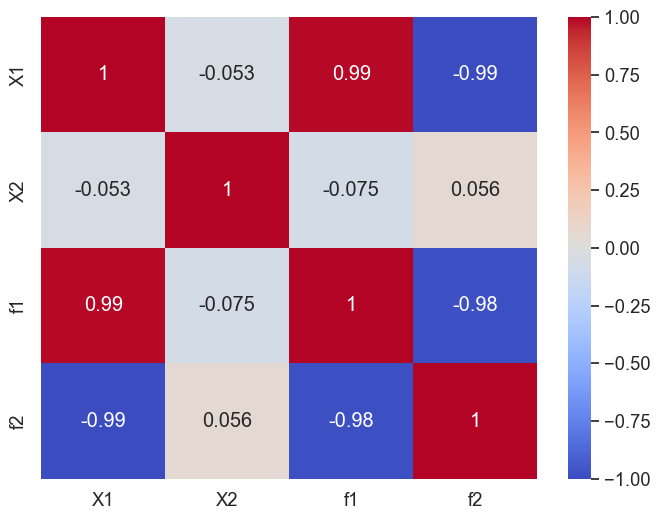

In [16]:
# définition de la taille de la figure et d'une dimension de caractères qui rende la figure lisible
# setup of the figure and font sizes
plt.figure(figsize = (8,6))
sns.set(font_scale=1.2)

# entrez ci-dessous votre code python / write your code here
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')
# fig = sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')
# savefig("svg-images/heatmap1.png")

<div class="rq">
Si tout va bien, vous venez d'obtenir la carte thermique suivante (<i>les valeurs peuvent légèrement changer compte tenu du bruit statistique,</i> cf variable <code>noise</code></i>).
<br><br>
<b>Commentaires</b><br>
    <li> les deux séries de variables `X1` et `X2` ont été générées aléatoirement. Les deux séries sont indépendantes l'une de l'autre, ou bien cela signifierait qu'il y a un problème avec le générateur utilisé
    <li> `f1` et `f2` sont des fonctions des nombres contenus dans `X1`. Il ne peut donc pas y avoir de corrélation statistique avec `X2`.
    <li> `f1` étant une fonction croissante de `X1` (au bruit statistique près), il y a corrélation positive entre les deux. On ne peut pas obtenir 1 à cause de la petite fluctuation positive introduite (reprenez le sujet et créez un bruit élevé en augmentant la valeur de <code>noise</code>). 
    <li> il y a une forte corrélation négative entre `f2` et `X1`, puisque `f2` est une fonction qui décroit en fonction de `X1`
    <li> la forte corrélation négative entre `f1` et `f2` est également attendue

<p style="text-align: center"><img width="500px" src="./svg-images/heatmap1-saved-C.png" style="margin-left:auto; margin-right:auto" id="img_heatmap1"/></p>   

</div>

<div class="rqE">

If all went well, you have just obtained the previous heat map (<i>the values may change slightly due to statistical noise</i>, see variable `noise`).

<b>Comments</b><br>
- the two series of variables `X1` and `X2` were generated randomly. The two series are independent of each other, or it would mean that there is a problem with the generator used
- `f1` and `f2` are functions of the numbers contained in `X1`. Therefore, there can be no statistical correlation with `X2`.
- `f1` being an increasing function of `X1` (except for statistical noise), there is a positive correlation between the two. We cannot obtain 1 because of the small positive fluctuation introduced (go back to the subject and create a high noise by increasing the value of `noise`).
- there is a strong negative correlation between `f2` and `X1`, since `f2` is a function that decreases as a function of `X1`
- the strong negative correlation between `f1` and `f2` is also expected
</div>

In [17]:
vID.end(cwd0)

**Fin à:** Sunday 21 May 2023, 19:51:25  
**Durée:** 00:08:14 018ms

<p style="text-align: center"><img width="800px" src="../config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>